## Association subtypes language task

In [116]:
import seaborn as sns
import os
import numpy as np
from scipy import stats, integrate
import scipy.io as sio
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [111]:
import scipy.io #read .mat files
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,SVR,LinearSVC
from sklearn import preprocessing, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import shuffle

In [13]:
# load good stuff
%matplotlib inline
%load_ext rpy2.ipython
%load_ext oct2py.ipython
sns.set(color_codes=True)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The oct2py.ipython extension is already loaded. To reload it, use:
  %reload_ext oct2py.ipython


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Add niak hcp and psomm to oactve path
%octave addpath(genpath('~/git/Misc'));
%octave build_path hcp niak psom

Adding library hcp to the search path.

Adding library niak to the search path.

Adding library psom to the search path.

In [16]:
#  Set path
#path_root = '/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_03-Oct-2017/';
path_root = '/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/';
path_subtype = os.path.join(path_root,'subtype_7_spm_LANGUAGE_18-Oct-2017/');
path_association =  os.path.join(path_subtype,'associations/');
path_networks =  os.path.join(path_subtype,'networks/');
nb_sbt = 7

In [17]:
#custom function for key sorting element
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [18]:
# List phenotypes
list_pheno  = [f for f in os.listdir(path_association)]
list_pheno.sort(key=natural_keys)
list_pheno

['Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_4',
 'Cluster_5',
 'Cluster_6',
 'Cluster_7',
 'Cluster_8',
 'Cluster_9',
 'Cluster_10']

In [19]:
# List trials
list_trial  = [f for f in os.listdir(path_networks)]
list_trial 

['story']

In [20]:
list_subtype = ['sub{}'.format(ii) for ii in range(1,nb_sbt+1)]
list_subtype

['sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7']

In [21]:
# Create R-squared table to be used in R
for trial_name in list_trial :
    # build R2 table for radar plot
    for ix, pheno_name in enumerate(list_pheno):
        mat_file = os.path.join(path_association,pheno_name,'association_stats_{}.mat'.format(pheno_name))
        %octave_push mat_file
        %octave mat_load = load(mat_file);
        %octave_pull mat_load
        pheno_r2 = mat_load['glm_results'][trial_name]['rsquare']
        if ix == 0:
            pheno_r2_final = pd.Series(pheno_r2.tolist()[0])
        else:
            pheno_r2_final =pd.concat([pheno_r2_final,pd.Series(pheno_r2.tolist()[0])],axis=1)
            
    pheno_r2_final.columns = list_pheno
    pheno_r2_final.index = list_subtype
    pheno_r2_final = pd.DataFrame(pheno_r2_final)
    pheno_r2_final.to_csv(os.path.join(path_subtype,'{}_r2.csv'.format(trial_name)))

In [22]:
pheno_r2_final

,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
sub1,0.022735,0.027419,0.026915,0.028526,0.023553,0.027369,0.026543,0.031727,0.027224,0.038666
sub2,0.027240,0.028419,0.025508,0.027223,0.025119,0.028267,0.026174,0.025576,0.025338,0.028402
sub3,0.021469,0.025408,0.025630,0.027257,0.022023,0.024985,0.024838,0.029508,0.025212,0.037171
sub4,0.026676,0.017956,0.018005,0.018573,0.017541,0.018858,0.017019,0.018677,0.034945,0.089938
sub5,0.023339,0.027675,0.027447,0.028848,0.023792,0.026606,0.027097,0.029806,0.025509,0.032361
sub6,0.021616,0.026729,0.026047,0.027305,0.023652,0.026703,0.027392,0.036615,0.031645,0.037010
sub7,0.027852,0.029202,0.028166,0.031084,0.027713,0.030660,0.027493,0.040042,0.044201,0.095245


### On first run in new machine do
Step 1 — Installing System Dependencies for devtools

`sudo apt-get install build-essential libcurl4-gnutls-dev libxml2-dev libssl-dev libcairo2-dev r-cran-stringr`

Step 2 — Installing the Devtools Package

```sudo -i R
install.packages('devtools')
devtools::install_github("hadley/svglite")
devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)```

In [23]:
%%R
library(ggradar)
library(svglite)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

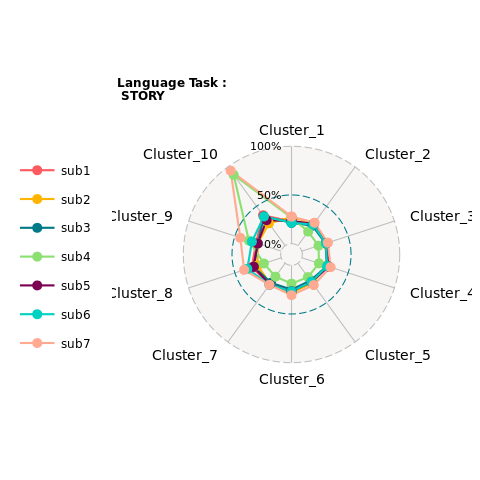

In [24]:
%%R -i path_subtype,path_association,list_trial
for (ii in list_trial) {
    MyData <- read.csv(file=paste(path_subtype,ii,"_r2.csv",sep = ''))
    # plot R2 radar plot
    image_radar=ggradar(MyData, 
                        grid.min = 0,
                        grid.mid = 0.05, 
                        grid.max = 0.1, 
                        axis.label.size = 5, 
                        grid.label.size = 5 ,
                        legend.text.size =5,
                        group.line.width = 1,
                        group.point.size = 4)  +
    theme(legend.text = element_text(size = 12),plot.title = element_text( face="bold",size = 12)) + 
    ggtitle(paste(' Language Task : \n  ',toupper(ii),sep = ''))
    print(image_radar)
    ggsave(file=paste(path_subtype,ii,"_R-squared.svg",sep = ''), plot=image_radar, width=10, height=8)
}

In [25]:
# # plot association wieght and phenotypes
# for trial_name in list_trial :
#     # build R2 table for radar plot
#     for ix, pheno_name in enumerate(list_pheno):
#         mat_file = os.path.join(path_association,pheno_name,'association_stats_{}.mat'.format(pheno_name))
#         %octave_push mat_file
#         %octave mat_load = load(mat_file);
#         %octave_pull mat_load
#         model_y =mat_load['model_raw']['y']
#         model_x = mat_load['model_raw']['x']
#         model_labels_x = mat_load['model_raw']['labels_x']
#         model_labels_y = mat_load['model_raw']['labels_y']
#         concat = [np.concatenate([model_y[x], model_x[x]]) for x in range(np.shape(model_y)[0])]
#         model_df = pd.DataFrame(concat)
#         model_df.index = model_labels_x
#         colnames = np.concatenate([list_subtype,model_labels_y])
#         model_df.columns = colnames
#         model_df.to_csv(os.path.join(path_subtype,'{}_pheno_subtype.csv'.format(trial_name)))
        
#         # plot association maps
#         #for subtype in list_subtype:
#         #    fig = plt.figure(figsize=(9,16))
#         #    ax1 = fig.add_subplot(511)
#         #    ax1 = sns.regplot(x=pheno_name, y=subtype, data=model_df,color="#BCB6FF");
#         #    ax1.set_ylabel('{}_{}'.format(trial_name,subtype))
#         #    ax1.set_xlabel(pheno_name)

## Random forest and linear regressionn association 

In [220]:
def RandomForest_apply(data_X, data_Y,n_splits=3):
    """
    data_X: predictor
    data_Y: variable to be predicted
    n_splits: number of split data
    
    returns:
    feimp:   mean feature importance
    scores: Mean R-squared
    std:    standar deviantion of R-squared
    """
    # apply machine learning : Random forest regression
    rfr = RandomForestRegressor(n_estimators=4000,oob_score=True,n_jobs=-1)
    skf = KFold(n_splits)
    feimp = np.zeros((skf.n_splits,x.shape[1]))
    scores = np.zeros((skf.n_splits,1))
    std =  np.zeros((skf.n_splits,x.shape[1]))
    
    #scale Y
    scl = StandardScaler()
    data_Y = scl.fit_transform(data_Y.reshape(-1, 1))
    minmiax = MinMaxScaler(feature_range=(-1, 1))
    data_Y = minmiax.fit_transform(data_Y)[:,0]
    #scale x
    scl = StandardScaler()
    data_X = scl.fit_transform(data_X)
    data_X, data_Y = shuffle(x, data_Y, random_state=0)
    
    for c, (train_index, test_index) in enumerate(skf.split(x)):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        rfr.fit(x_train, y_train)
        y_pred = rfr.predict(x_test)
        
        rsq = rfr.score(x_test, y_test)
        scores[c,:] = rsq
        
        feimp[c,:] = rfr.feature_importances_[:]
        
        std[c,:] = np.std([tree.feature_importances_ for tree in rfr.estimators_],axis=0)
        
        # Plot outputs
        plt.figure(figsize=(15,4))
        s = 100
        a = 0.7
        
        fit_a = np.polyfit(x_test.reshape(-1), y_test, deg=1)
        plt.plot(x_test.reshape(-1), fit_a[0] * x_test.reshape(-1) + fit_a[1], color='navy',alpha=a)
        
        plt.scatter(x_test, y_test,  edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Test Data")
        
        fit_b = np.polyfit(x_test.reshape(-1), y_pred, deg=1)
        plt.plot(x_test.reshape(-1), fit_b[0] * x_test.reshape(-1) + fit_b[1], color='c',alpha=a)
        
        plt.scatter(x_test, y_pred, edgecolor='k',
            c="c", s=s, marker="^", alpha=a,label="Predicted data -- RSquared=%.2f" % scores[c,:] )
        plt.title("Prediction on subset number {}".format(c))
        plt.legend()
        plt.show()
        #     plt.figure()
        #     plt.scatter(y_test, y_test, edgecolor='k',
        #             c="navy", s=s, marker="s", alpha=a, label="Test Data")
        
        #     plt.scatter(y_train, pred, edgecolor='k',
        #             c="c", s=s, marker="^", alpha=a,
        #             label="Prediction -- RF score=%.2f" % rsq)
        #     plt.title("Prediction on subset number {}".format(c))
        #     plt.legend()
        #     plt.show()
    return x_test, y_test,feimp, scores,std

In [178]:
def LinearRegression_apply(data_X, data_Y,n_splits=2):
    """
    data_X: predictor
    data_Y: variable to be predicted
    n_splits: number of split data
    
    returns:
    Coeff:   Mean Estimated coefficients for the linear regression problem
    SquaredError: Mean Squared Error
    Rsquared:     Mean coefficient of determination
    """
    # apply machine learning : Linear Regression
    regr = linear_model.LinearRegression()
    skf = KFold(n_splits)
    Coeff = np.zeros((skf.n_splits,1))
    SquaredError = np.zeros((skf.n_splits,1))
    Rsquared =  np.zeros((skf.n_splits,1))
    
    #scale Y
    scl = StandardScaler()
    data_Y = scl.fit_transform(data_Y.reshape(-1, 1))
    minmiax = MinMaxScaler(feature_range=(-1, 1))
    data_Y = minmiax.fit_transform(data_Y)[:,0]
    #scale x
    scl = StandardScaler()
    data_X = scl.fit_transform(data_X)
    data_X, data_Y = shuffle(x, data_Y, random_state=0)
    
    for c, (train_index, test_index) in enumerate(skf.split(x)):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        
        Coeff[c,:] = regr.coef_[:]
        SquaredError[c,:] = mean_squared_error(y_test, y_pred)
        Rsquared[c,:] = r2_score(y_test,y_pred) 
        
        # Plot outputs
        plt.figure(figsize=(15,4))
        s = 100
        a = 0.7
        plt.scatter(x_test, y_test,  edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Test Data")
        plt.scatter(x_test, y_pred, edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="Predicted data -- RSquared=%.2f" % Rsquared[c,:])
        plt.title("Prediction on subset number {}".format(c))
        plt.legend()
        plt.show()
        
    print('Mean R-Squared score: %.3f' % Rsquared.mean())    
    return Coeff, SquaredError,Rsquared

In [151]:
for trial_name in list_trial :
    # collect all clusters
    allClusters = []
    nameClusters = []
    for ix, pheno_name in enumerate(list_pheno):
        #from IPython.core.debugger import Tracer; Tracer()() 
        mat_file = os.path.join(path_association,pheno_name,'association_stats_{}.mat'.format(pheno_name))
        %octave_push mat_file
        %octave mat_load = load(mat_file);
        %octave_pull mat_load
        model_x_norm = mat_load['model_norm']['x']
        model_labels_y_norm = mat_load['model_norm']['labels_y']
        myCluster = np.array(model_x_norm[:,1])
        myClusterName= model_labels_y_norm[1]
        allClusters.append(myCluster)
        nameClusters.append(myClusterName)
        
    # create clusters
    allClusters = np.transpose(allClusters)
    model_y_norm =mat_load['model_norm']['y']
    model_labels_x_norm = mat_load['model_norm']['labels_x']
    
    # concatenate clusters with subtype weight
    concat = [np.concatenate([model_y_norm[x], allClusters[x]]) for x in range(np.shape(model_y)[0])]
    all_clusters_df = pd.DataFrame(concat)
    all_clusters_df.index = model_labels_x_norm
    colnames = np.concatenate([list_subtype,nameClusters])
    all_clusters_df.columns = colnames
    
    # save as dataframe
    all_clusters_df.to_csv(os.path.join(path_subtype,'{}_pheno_subtype.csv'.format(trial_name)))

In [152]:
all_clusters_df.head()

,sub1,sub2,sub3,sub4,sub5,sub6,sub7,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
HCP100206,0.048963,-0.095228,-0.063092,0.008595,0.084046,0.102048,-0.134382,-0.272974,1.301661,0.062682,1.455280,0.733655,-0.527240,1.992592,1.260218,-0.048323,-0.252333
HCP100307,-0.546856,0.169975,0.570022,-0.170085,-0.522304,0.400836,-0.196883,-0.568115,0.540875,-0.942447,-0.694289,-0.531497,-0.157826,-0.685716,0.195008,0.075146,-0.493210
HCP100408,0.060119,-0.028387,-0.037967,0.131137,0.052511,-0.123764,-0.002537,1.245277,0.110246,-0.511868,-0.015089,-0.081582,0.204485,-0.571956,0.323378,-0.061878,0.047405
HCP100610,-0.322992,0.036610,0.289544,0.143358,-0.300909,0.314680,-0.223959,0.962717,-0.343096,-0.871910,-0.367457,-0.547429,-0.214848,0.220374,0.584764,0.469183,1.294606
HCP101006,-0.004455,-0.062179,-0.031612,-0.100879,0.025436,0.158367,-0.041583,0.680002,0.055827,0.065551,-0.864545,-0.355527,-0.326095,-0.736469,-1.217317,0.009555,-0.542530


In [153]:
# calculate Rsquared with randomForst
all_clusters_df = all_clusters_df.reset_index().rename(columns={'index': 'Subject'})
all_clusters_df.head()

,Subject,sub1,sub2,sub3,sub4,sub5,sub6,sub7,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100206,0.048963,-0.095228,-0.063092,0.008595,0.084046,0.102048,-0.134382,-0.272974,1.301661,0.062682,1.455280,0.733655,-0.527240,1.992592,1.260218,-0.048323,-0.252333
1,HCP100307,-0.546856,0.169975,0.570022,-0.170085,-0.522304,0.400836,-0.196883,-0.568115,0.540875,-0.942447,-0.694289,-0.531497,-0.157826,-0.685716,0.195008,0.075146,-0.493210
2,HCP100408,0.060119,-0.028387,-0.037967,0.131137,0.052511,-0.123764,-0.002537,1.245277,0.110246,-0.511868,-0.015089,-0.081582,0.204485,-0.571956,0.323378,-0.061878,0.047405
3,HCP100610,-0.322992,0.036610,0.289544,0.143358,-0.300909,0.314680,-0.223959,0.962717,-0.343096,-0.871910,-0.367457,-0.547429,-0.214848,0.220374,0.584764,0.469183,1.294606
4,HCP101006,-0.004455,-0.062179,-0.031612,-0.100879,0.025436,0.158367,-0.041583,0.680002,0.055827,0.065551,-0.864545,-0.355527,-0.326095,-0.736469,-1.217317,0.009555,-0.542530


In [154]:
# import all pheno data
all_pheno = pd.read_csv(os.path.join(path_root,'pheno/hcp_all_pheno_clean_nonan_norm.csv'))
# set subject names with Prefix HCP
all_pheno.rename(columns={'Unnamed: 0': 'Subject'},inplace=True)
all_pheno['Subject'] = 'HCP'+ all_pheno['Subject'].astype(str)

In [155]:
all_pheno.head()

,Subject,Handedness,SSAGA_Educ,BMI,BPSystolic,BPDiastolic,PSQI_Score,PicSeq_Unadj,CardSort_Unadj,Flanker_Unadj,...,ASR_Rule_Pct,ASR_Intr_Pct,ASR_Intn_T,ASR_Extn_T,DSM_Depr_Pct,DSM_Anxi_Pct,DSM_Somp_Pct,DSM_Avoid_Pct,DSM_Adh_Pct,DSM_Antis_Pct
0,HCP100004,0.656079,-0.452234,-0.261076,0.705701,-0.040407,0.914461,0.545140,-1.138476,0.963764,...,-0.560381,-0.138390,0.905444,0.581186,0.872069,-0.431043,-0.684158,1.609362,-0.311177,1.862050
1,HCP100206,-0.006065,0.640665,-0.055687,-0.391613,-0.586484,0.251477,1.012772,0.414128,1.808004,...,0.598684,1.129563,2.036715,1.146888,2.254271,1.501363,2.590293,2.105813,1.602376,0.819715
2,HCP100307,0.656079,0.640665,-0.712932,-0.528777,-0.677497,-0.743000,-0.048759,0.862312,0.023611,...,-0.560381,-0.681798,-0.885736,-0.323938,-0.682909,-0.624284,-0.684158,-0.707406,-0.659096,-0.431086
3,HCP100408,-0.226780,0.640665,0.142558,1.871597,1.506814,-0.080015,1.059755,-0.363632,0.884836,...,0.405506,-0.681798,-0.980008,-0.210797,-0.682909,-0.431043,-0.684158,-0.707406,-0.659096,-0.431086
4,HCP100610,0.435365,0.640665,1.778527,1.117194,-0.222433,-0.080015,-0.164015,1.454382,1.419354,...,-0.753559,-0.138390,0.434081,-0.323938,-0.682909,-0.624284,-0.684158,2.602263,-0.833056,-0.639553


In [156]:
# Merge all pheno with subtype weights
all_pheno_pruned = pd.merge(all_clusters_df[['Subject']+list_subtype],all_pheno,on='Subject',how='left')
# Drop NaN
all_pheno_pruned.dropna(inplace=True)

In [157]:
all_pheno_pruned.head()

,Subject,sub1,sub2,sub3,sub4,sub5,sub6,sub7,Handedness,SSAGA_Educ,...,ASR_Rule_Pct,ASR_Intr_Pct,ASR_Intn_T,ASR_Extn_T,DSM_Depr_Pct,DSM_Anxi_Pct,DSM_Somp_Pct,DSM_Avoid_Pct,DSM_Adh_Pct,DSM_Antis_Pct
0,HCP100206,0.048963,-0.095228,-0.063092,0.008595,0.084046,0.102048,-0.134382,-0.006065,0.640665,...,0.598684,1.129563,2.036715,1.146888,2.254271,1.501363,2.590293,2.105813,1.602376,0.819715
1,HCP100307,-0.546856,0.169975,0.570022,-0.170085,-0.522304,0.400836,-0.196883,0.656079,0.640665,...,-0.560381,-0.681798,-0.885736,-0.323938,-0.682909,-0.624284,-0.684158,-0.707406,-0.659096,-0.431086
2,HCP100408,0.060119,-0.028387,-0.037967,0.131137,0.052511,-0.123764,-0.002537,-0.226780,0.640665,...,0.405506,-0.681798,-0.980008,-0.210797,-0.682909,-0.431043,-0.684158,-0.707406,-0.659096,-0.431086
3,HCP100610,-0.322992,0.036610,0.289544,0.143358,-0.300909,0.314680,-0.223959,0.435365,0.640665,...,-0.753559,-0.138390,0.434081,-0.323938,-0.682909,-0.624284,-0.684158,2.602263,-0.833056,-0.639553
4,HCP101006,-0.004455,-0.062179,-0.031612,-0.100879,0.025436,0.158367,-0.041583,0.545722,-1.545133,...,-0.367204,-0.681798,-1.168554,-0.210797,-0.682909,-0.624284,-0.684158,-0.707406,-0.833056,-0.639553


In [158]:
['Subject']+list_subtype

['Subject', 'sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7']

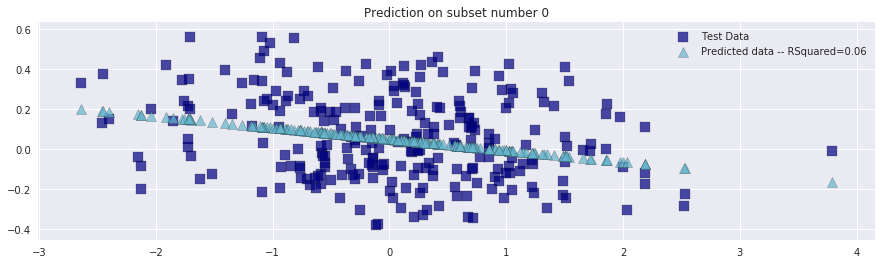

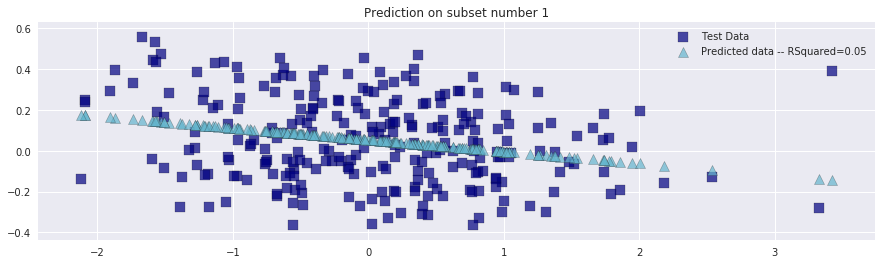

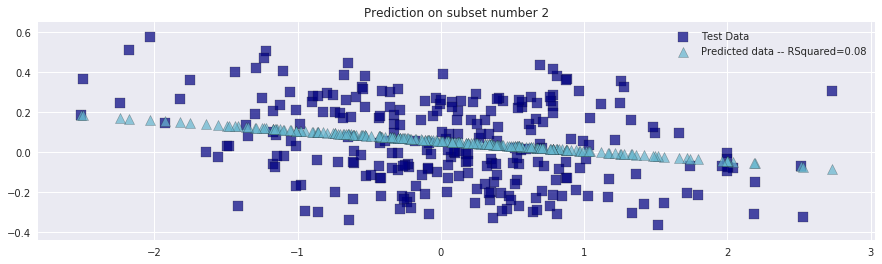

Mean R-Squared score: 0.062


In [163]:
# Set data X Y
#data_X = all_pheno_pruned.drop(['Subject']+list_subtype,axis=1)
data_X =all_pheno_pruned[['PicVocab_Unadj']]
x = data_X.values
data_Y = all_pheno_pruned['sub7']
y = data_Y.values
#feimp, scores,std = RandomForest_apply(x,y)
Coeff, SquaredError,Rsquared = LinearRegression_apply(x,y)


In [83]:
scores.mean()

0.021977932010297147

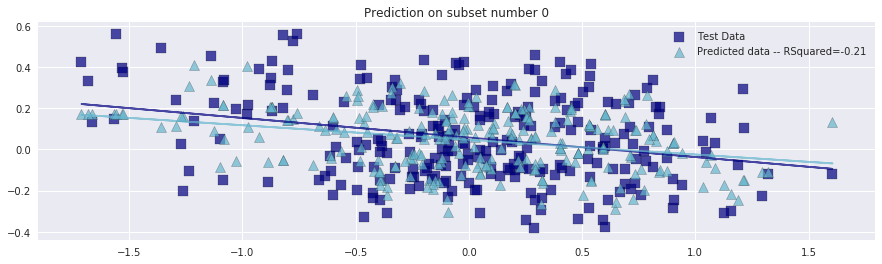

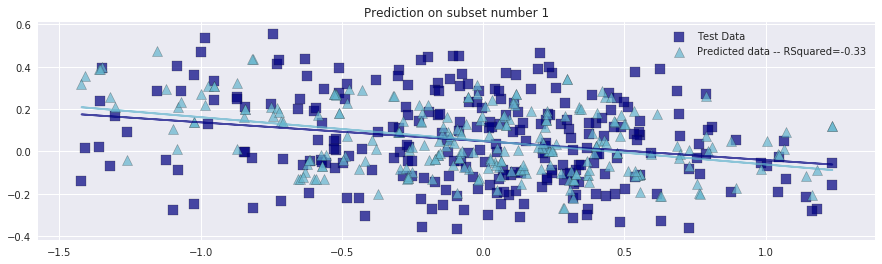

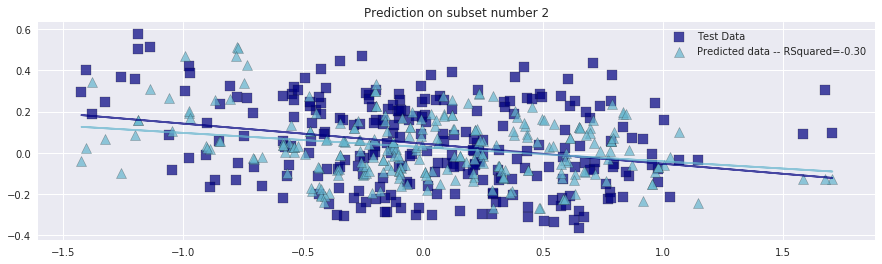

Mean R-Squared score: 0.062


In [221]:
# Set data X Y
#data_X = all_clusters_df.drop(['Subject']+list_subtype,axis=1)
data_X = all_clusters_df[['Cluster_10']]
x = data_X.values
data_Y = all_clusters_df['sub7']
y = data_Y.values
x_test, y_test,feimp, scores,std = RandomForest_apply(x,y)
#Coeff, SquaredError,Rsquared = LinearRegression_apply(x,y)
print('Mean R-Squared score: %.3f' % Rsquared.mean())

ValueError: x and y must be the same size

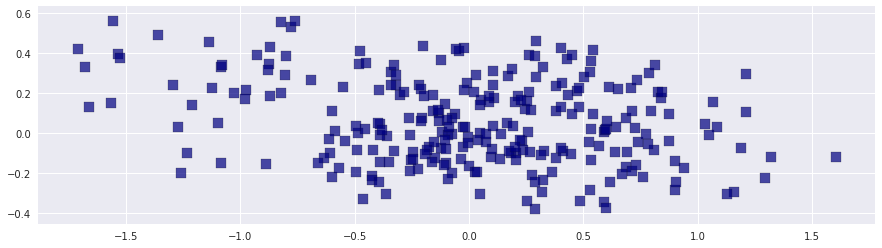

In [183]:
# Set data X Y
data_X = all_clusters_df.drop(['Subject']+list_subtype+list_pheno[:-1],axis=1)
x = data_X.values
data_Y = all_clusters_df['sub7']
y = data_Y.values
feimp, scores,std = RandomForest_apply(x,y)

In [ ]:
# Create estimated R-squared table to be used in R
for trial_name in list_trial :
    # build R2 table for radar plot
    for ix, pheno_name in enumerate(list_pheno):
        mat_file = os.path.join(path_association,pheno_name,'association_stats_{}.mat'.format(pheno_name))
        %octave_push mat_file
        %octave mat_load = load(mat_file);
        %octave_pull mat_load
        pheno_r2 = mat_load['glm_results'][trial_name]['rsquare']
        if ix == 0:
            pheno_r2_final = pd.Series(pheno_r2.tolist()[0])
        else:
            pheno_r2_final =pd.concat([pheno_r2_final,pd.Series(pheno_r2.tolist()[0])],axis=1)
            
    pheno_r2_final.columns = list_pheno
    pheno_r2_final.index = list_subtype
    pheno_r2_final = pd.DataFrame(pheno_r2_final)
    pheno_r2_final.to_csv(os.path.join(path_root,'{}_r2.csv'.format(trial_name)))

In [54]:
# Threshold future importance
feimp_thresh =0 # Percentile of future to be removed
mean_feimp = np.mean(feimp, axis=0)*100
mean_std = np.mean(std, axis=0)*100
feature_importances = pd.Series(mean_feimp,index= data_X.columns)
feature_importances_select = feature_importances[feature_importances >= np.percentile(mean_feimp,feimp_thresh)]
std_select = mean_std[feature_importances >= np.percentile(mean_feimp,feimp_thresh)]
indices = np.argsort(mean_feimp[feature_importances >= np.percentile(mean_feimp,feimp_thresh)])[::-1]

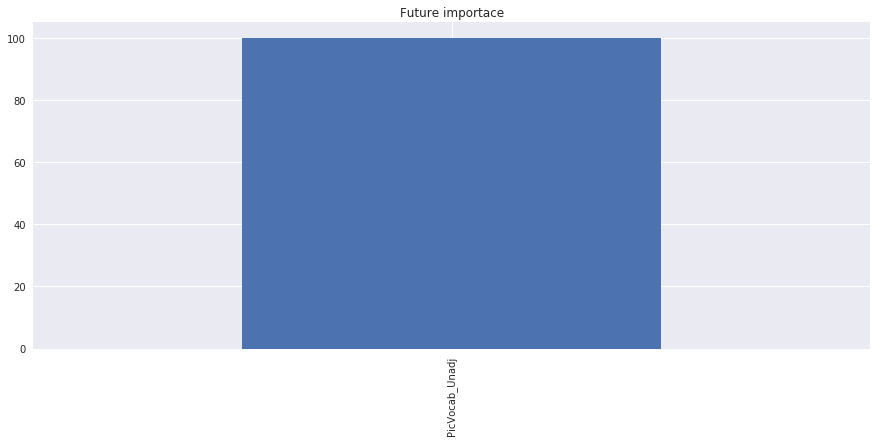

In [55]:
# Plot Future importance
feature_importances_select[indices].plot(kind='bar',yerr=std_select[indices],figsize=(15,6),title='Future importace')

In [56]:
scores

array([[-0.35333779],
       [-0.48486816],
       [-0.3182128 ]])

In [64]:
scores

array([[-0.35295668],
       [-0.4868827 ],
       [-0.31841786]])

In [190]:
plt.figure()
s = 100
a = 0.4
x_ = x_test[:,np.argsort(mean_feimp)[::-1][0]]


fit_a = np.polyfit(x_, y_test, deg=1)
plt.plot(x_, fit_a[0] * x_ + fit_a[1], color='navy',alpha=a)
plt.scatter(x_, y_test, edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Test Data")


fit_b = np.polyfit(x_, pred, deg=1)
plt.plot(x_, fit_b[0] * x_ + fit_b[1], color='g',alpha=a)
plt.scatter(x_, pred, edgecolor='k',
            c="g", s=s, marker="^", alpha=a,
            label="RF score=%.4f" % rfr.score(x_test, y_test))


plt.xlabel("X-Test")
plt.ylabel("Y-Pred")
plt.title("Comparing test data and predicted dat and the multi-output meta estimator")
plt.legend()
plt.show()

NameError: name 'x_test' is not defined

In [51]:
std_select[indices].shape

(9,)

In [52]:
std_select[indices]

array([ 4.84548658,  3.24477423,  2.86720442,  2.73040351,  2.86441353,
        2.99368809,  2.3489003 ,  3.37855537,  2.87140772])

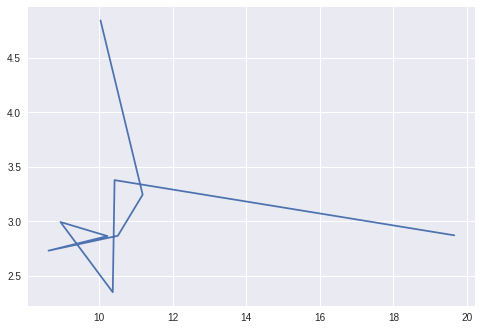

In [53]:
plt.plot(feature_importances_select,std_select[indices])

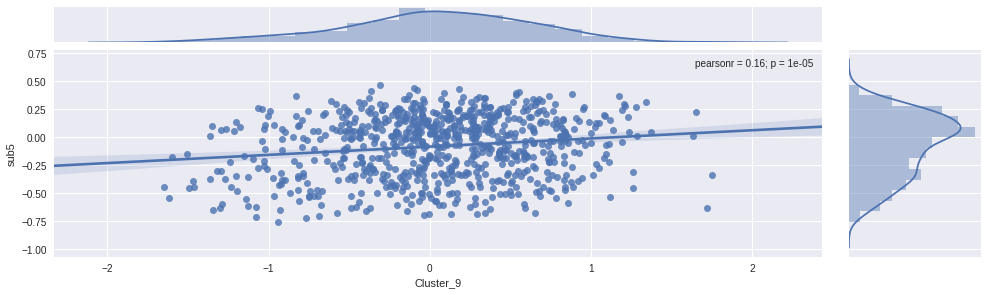

In [55]:
grid = sns.jointplot( y="sub5", x="Cluster_9", data=all_pheno_pruned,kind='reg');
grid.fig.set_figwidth(15)
grid.fig.set_figheight(4)

In [152]:
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))


In [186]:
np.argsort(mean_feimp)[::-1]

array([12, 47, 15, 45, 13, 11,  4, 43, 14, 20, 22, 30,  1,  2,  3,  6, 16,
        0, 26, 36,  8, 17, 44, 24, 31, 40, 48, 10, 32, 34, 49, 50,  7, 27,
       41, 39, 33, 29,  5, 46, 65,  9, 42, 25, 38, 28, 18, 23, 19, 21, 35,
       55, 37, 60, 58, 59, 57, 62, 56, 52, 53, 63, 64, 54, 66, 61, 51])

In [24]:
log = LinearRegression()
log.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
predRfr = rfr.predict(x_test)
predLog = log.predict(x_test)

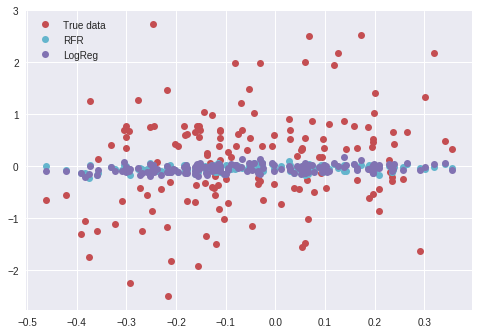

In [149]:
plt.plot(y_test, x_test[:,np.argsort(mean_feimp)[::-1][0]],'ro', label='True data')
plt.plot(y_test, predRfr, 'co', label='RFR')
plt.plot(y_test, predLog, 'mo', label='LogReg')
plt.legend()
plt.show()plt.plot(y_test, x_test[:,np.argsort(mean_feimp)[::-1][0]],'ro', label='True data')
plt.plot(y_test, predRfr, 'co', label='RFR')
plt.plot(y_test, predLog, 'mo', label='LogReg')
plt.legend()
plt.show()

In [76]:
scl = preprocessing.StandardScaler()
y = scl.fit_transform(y.reshape(-1, 1))[:,0]
#x = scl.fit_transform(x)

In [126]:
# init CV
scores = []
skf = KFold(n_splits=3)
for train_index, test_index in skf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # train model
    clf = SVR(kernel='linear', C=1e3)
    #clf = SVR(kernel='rbf', C=1e1, gamma=0.1)
    
    # grid search cv
    #clf = GridSearchCV(clf, cv=10,param_grid={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)},n_jobs=6)

    clf.fit(x_train, y_train)
    #sv_ratio = clf.best_estimator_.support_.shape[0] / (1.*len(y_train))
    #print("Support vector ratio: %.3f" % sv_ratio)
    
    # test
    scores.append(clf.score(x_test,y_test))
    #print(scl.inverse_transform(clf.predict(x_test)))
    print(scores[-1])
    
print('Average R2: ', np.mean(scores))


0.0643228755385
0.038372600127
0.0508334175103
Average R2:  0.0511762977253


In [156]:
# train model
#clf = SVR(kernel='rbf', C=1.0, epsilon=0.2, gamma=.0001)
clf = SVR(kernel='rbf', C=1e1, gamma=0.1)
log = LinearRegression()
# grid search cv
#clf = GridSearchCV(clf, cv=10,param_grid={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)},n_jobs=6)
log.fit(x,y)
clf.fit(x,y)

ValueError: Found input variables with inconsistent numbers of samples: [782, 506]

In [131]:
predSvr = clf.predict(x_test)
predLog = log.predict(x_test)

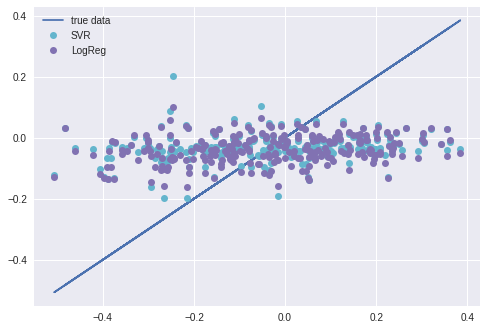

In [132]:
plt.plot(y_test, y_test, label='true data')
plt.plot(y_test, predSvr, 'co', label='SVR')
plt.plot(y_test, predLog, 'mo', label='LogReg')
plt.legend()
plt.show()

In [71]:
plt.plot(testY, predLog, 'mo', label='LogReg')
plt.legend()
plt.show()

NameError: name 'testY' is not defined

In [50]:
clf = SVR(kernel='rbf', C=1e1, gamma=0.1)
r = clf.fit(b, y_train)

In [53]:
print(r)

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [47]:
b = np.concatenate((np.ones(x_train.shape + (1,)), x_train[..., None]),1)

In [54]:
b

array([[ 1.        , -0.30849142],
       [ 1.        , -0.02320696],
       [ 1.        ,  0.08609446],
       ..., 
       [ 1.        ,  0.0869828 ],
       [ 1.        , -0.06180076],
       [ 1.        ,  0.03654179]])

In [48]:
b.shape

(521, 2)

In [35]:
x_train.shape

(521,)

In [36]:
y_train.shape

(521,)

In [43]:
y_train

array([  7.19714152e-01,  -6.16568569e-01,   7.51768143e-01,
        -2.56341148e-01,  -2.08548321e-01,   1.65869777e+00,
        -1.07640005e+00,  -7.56461032e-01,   1.39542587e+00,
        -1.22367986e+00,   2.70661413e+00,   1.62839525e+00,
        -1.33460468e+00,  -6.48535360e-01,  -3.56882679e-01,
        -3.44448382e-01,  -7.45097222e-01,   1.42174704e+00,
        -2.22163437e-01,  -9.20499026e-01,  -1.24371487e-01,
         1.16767668e+00,   1.06133380e+00,  -1.02564102e+00,
        -1.18123405e+00,  -4.89680258e-01,   2.24736959e-01,
        -8.24886981e-01,   1.15202306e+00,  -5.01649091e-01,
        -1.55980532e+00,  -9.39876426e-03,  -1.13018284e+00,
        -7.59630933e-01,   1.67678220e+00,  -9.78152128e-01,
         1.64552427e+00,   4.88957728e-02,  -5.34707072e-01,
         1.05340894e+00,  -1.29770426e+00,  -1.43982040e+00,
        -1.38773599e+00,   7.50200078e-01,  -3.53643982e-01,
         1.19984200e+00,   2.91774550e+00,  -2.99774797e-01,
         7.62898879e-01,

In [42]:
x_train

array([-0.30849142, -0.02320696,  0.08609446,  0.18430688, -0.21208545,
       -0.58278535,  0.00305323, -0.77162255, -0.45663901,  0.05136636,
        0.22729541, -0.16015158, -0.68875003, -0.43226511,  0.05376947,
        0.22713237, -0.88893138, -0.37382915, -0.02761577, -0.4243101 ,
        0.26484978, -0.54914459, -0.12306755,  0.45521993,  0.15100539,
       -0.20144924, -0.17204038, -0.10768164, -0.15872905, -0.33746947,
       -0.47054225,  0.08342435,  0.23408141,  0.13521806,  0.17529201,
       -0.11546233,  0.12689403,  0.10487231,  0.24965284, -0.86906494,
       -0.59365779,  0.03719171,  0.39182195, -0.0533519 ,  0.3295965 ,
        0.12125083, -0.15920628,  0.08991829, -0.13515812,  0.02440385,
        0.21928849,  0.01790158,  0.06929018,  0.15320444, -0.08628468,
        0.20753865, -0.02964557,  0.04064956, -0.2006894 ,  0.33961272,
        0.08358905, -0.38963218, -0.1998677 , -0.02621379, -0.18704808,
       -0.22423859,  0.51361047, -0.46549336,  0.00626338, -0.83

In [37]:
type(y_train)

numpy.ndarray

In [38]:
type(x_train)

numpy.ndarray

In [40]:
np.sum(np.isnan(y_train))

0